In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import math
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

In [5]:
path = 'C:/Users/2104734084/Documents/Modelos_MachineLearning/regressao-linear-simples/data/'
file_name = 'pizza.xlsx'

df = pd.read_excel(f"{path}{file_name}")

In [6]:
df

,estudante,pizza
0,2,55
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


<AxesSubplot:xlabel='estudante', ylabel='pizza'>

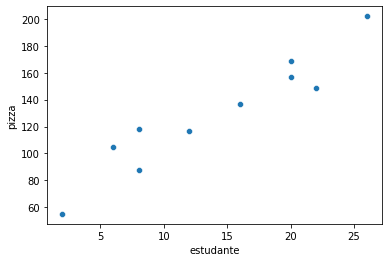

In [7]:
#grafico de dispersao
sns.scatterplot(data=df, x="estudante", y="pizza")

In [8]:
#modelo MRLS
#ols: minímos quadrados
#function: y~x's
function = 'pizza~estudante'
model = smf.ols(formula=function, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  pizza   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     72.46
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           2.79e-05
Time:                        16:55:21   Log-Likelihood:                -39.590
No. Observations:                  10   AIC:                             83.18
Df Residuals:                       8   BIC:                             83.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.8127      9.458      6.218      0.0

c:\Users\2104734084\Documents\Modelos_MachineLearning\regressao-linear-simples\venv\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
# Tnterpretação: 
# Temos que:
#Prob (F-statistic): Teste F
#P>|t|: Teste T

In [9]:
df["resp_modelo"] = model.predict(df)
df["resp_media"] = statistics.mean(df["pizza"])
df

,estudante,pizza,resp_modelo,resp_media
0,2,55,68.939437,129.7
1,6,105,89.192958,129.7
2,8,88,99.319718,129.7
3,8,118,99.319718,129.7
4,12,117,119.573239,129.7
5,16,137,139.826761,129.7
6,20,157,160.080282,129.7
7,20,169,160.080282,129.7
8,22,149,170.207042,129.7
9,26,202,190.460563,129.7


In [11]:
#calculando MSE
# MSE assumando a media
MSE_media = statistics.mean( (df["pizza"] - df["resp_media"] )**2)
RMSE_media = math.sqrt(MSE_media)
print('MSE = ', MSE_media, 'RMSE = ', RMSE_media)

MSE =  1617.01 RMSE =  40.21206286675679


In [12]:
# MSE assumando o modelo
MSE_modelo = statistics.mean((df["pizza"] - df["resp_modelo"])**2)
RMSE_modelo = math.sqrt(MSE_modelo)
print('MSE = ', MSE_modelo, 'RMSE = ', RMSE_modelo)

MSE =  160.78183098591558 RMSE =  12.679977562516251


In [13]:
#RMSE: Significa em média quanto o meu modelo erra (pra cima ou para baixo), considerando o valor real.
#RMSE e MAE: usados para medir a acurácia de modelos preditivos que possuem como targets variáveis contínuas.
#Quanto menor o RMSE melhor.
#